# Laporan Proyek Machine Learning - Submission 1: Predictive Analytics
- Nama: Imam Agus Faisal
- Email: imamagusfaisal120@gmail.com
- Id Dicoding: imamaf

## Problem Statement

- Fitur apa yang paling berpengaruh terhadap harga rumah?
- Berapa harga rumah dengan karakteristik atau fitur tertentu?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Data Wrangling

**Memuat setiap tabel pada dataset**

In [2]:
house_df=pd.read_excel("dataset.xlsx")
house_df.head()

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles


### Assessing Data
**Melihat informasi, Memeriksa missing value, Memeriksa duplikasi, dan Memeriksa parameter statistik pada setiap tabel**

In [3]:
print('\n', house_df.info())
print('\nMissing value house:\n', house_df.isnull().sum())
print('\nJumlah duplikasi house:\n', house_df.duplicated().sum())
print('\n\nParameter statistik house:\n', house_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      3360 non-null   object 
 1   Price        3360 non-null   int64  
 2   Description  3360 non-null   object 
 3   Place        3344 non-null   object 
 4   Beds         3360 non-null   int64  
 5   Bath         3360 non-null   float64
 6   Sq.Ft        3360 non-null   int64  
 7   Website      3359 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 210.1+ KB

 None

Missing value house:
 Address         0
Price           0
Description     0
Place          16
Beds            0
Bath            0
Sq.Ft           0
Website         1
dtype: int64

Jumlah duplikasi house:
 0


Parameter statistik house:
               Price         Beds         Bath         Sq.Ft
count  3.360000e+03  3360.000000  3360.000000   3360.000000
mean   7.500648e+05     3.125000     2.479167

<Axes: xlabel='Price'>

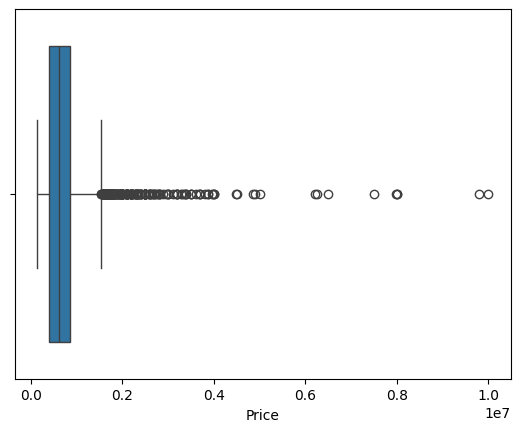

In [4]:
sns.boxplot(x=house_df['Price'])

<Axes: xlabel='Beds'>

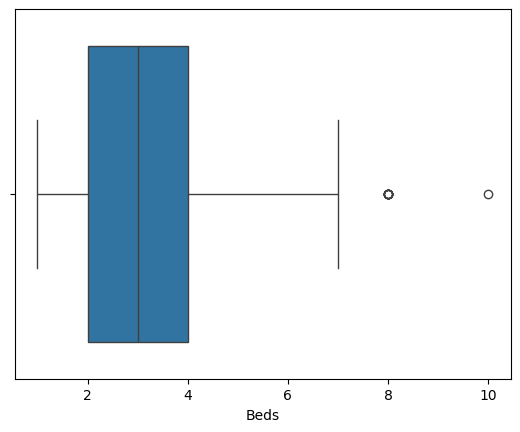

In [5]:
sns.boxplot(x=house_df['Beds'])

<Axes: xlabel='Bath'>

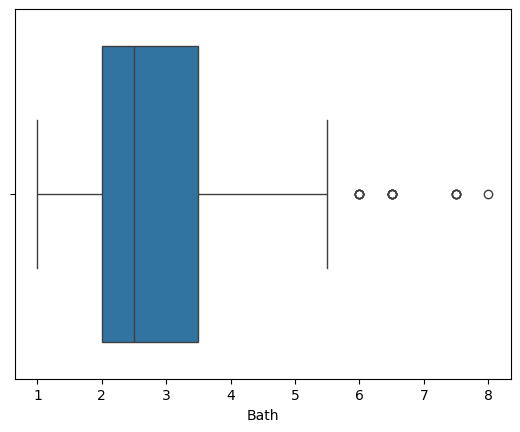

In [6]:
sns.boxplot(x=house_df['Bath'])

<Axes: xlabel='Sq.Ft'>

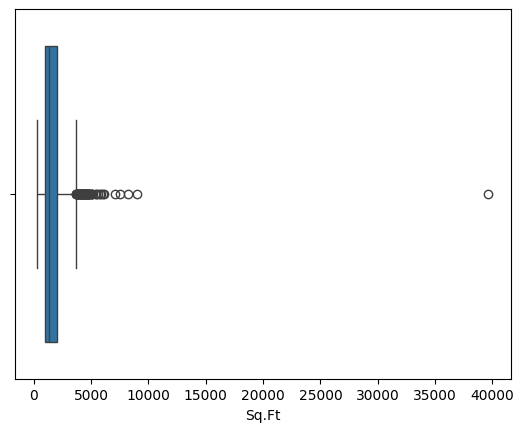

In [7]:
sns.boxplot(x=house_df['Sq.Ft'])

**Rangkuman Hasil Analisis Tahap Assesing Data pada Dataset:**
*   Terdapat missing value pada kolom Place dan Website
*   Terdapat beberapa kolom yang mempunyai Outliers
*   Tidak terdapat adanya duplikasi
*   Tidak terdapat innacurate value



### Cleaning Data
##### Missing Value
Karena dataset yang dimiliki cukup banyak, maka metode yang akan kita gunakan untuk menangani missing value adalah dengan menghapus/drop baris yang terdapat missing value tersebut.

In [8]:
house_df.loc[(house_df['Place'].isna())]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
122,1066 Creekside Blvd SW,580900,CA AB T2X5K6,NaN,1,1.5,964,Maxwell Canyon Creek
641,62 Royston Terrace NW,849900,CA AB T3L 0J2,NaN,3,2.5,2467,Cir Realty
1154,3250 84 St SE,2400000,CA AB T2B 3C1,NaN,6,2.0,2147,RE/MAX Key
1174,8535 19 Ave SE #424,455000,CA AB T2A 7W8,NaN,2,1.5,1193,Exp Realty
1245,99 Taralake Way NE,672000,CA AB T3J0A7,NaN,5,3.5,1749,One Percent Realty
1324,148 Savanna Dr NE,850000,CA AB T3J2H5,NaN,4,3.0,2315,Maxwell Central
1519,9110 34 Ave,2299000,CA AB T1X 0L5,NaN,6,4.5,2034,Real Broker
1630,71 Lynx Meadows Dr NW,2000000,CA AB T3L 3L9,NaN,6,4.5,3688,Greater Property Group
1846,8535 19 Ave SE #421,505000,CA AB T2A 7W8,NaN,3,2.5,1428,Exp Realty
1867,4520 84 Ave NE,1000000,CA AB T3J 4C4,NaN,5,4.0,2753,Century 21 Bravo Realty


In [9]:
house_df.loc[(house_df['Website'].isna())]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
160,341 Walcrest View SE,820000,CA AB T2X 4V9,Walden,5,3.5,2235,NaN


In [10]:
house_df.dropna(axis=0, inplace=True)

Mengecek kembali dataset yang sudah dibersihkan

In [11]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3343 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      3343 non-null   object 
 1   Price        3343 non-null   int64  
 2   Description  3343 non-null   object 
 3   Place        3343 non-null   object 
 4   Beds         3343 non-null   int64  
 5   Bath         3343 non-null   float64
 6   Sq.Ft        3343 non-null   int64  
 7   Website      3343 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 235.1+ KB


In [12]:
print('\nMissing value house:\n', house_df.isnull().sum())


Missing value house:
 Address        0
Price          0
Description    0
Place          0
Beds           0
Bath           0
Sq.Ft          0
Website        0
dtype: int64


##### Outliers

Hilangkan outliers yang terdapat pada kolom Price, Beds, Bath, dan Sq.Ft

In [28]:
Q1 = house_df['Price'].quantile(0.25)
Q3 = house_df['Price'].quantile(0.75)
IQR = Q3-Q1
lower = house_df['Price'] < Q1 - (1.5*IQR)
higher = house_df['Price'] > Q3 + (1.5*IQR)

house_df.drop(house_df[lower].index, inplace=True)
house_df.drop(house_df[higher].index, inplace=True)

<Axes: xlabel='Price'>

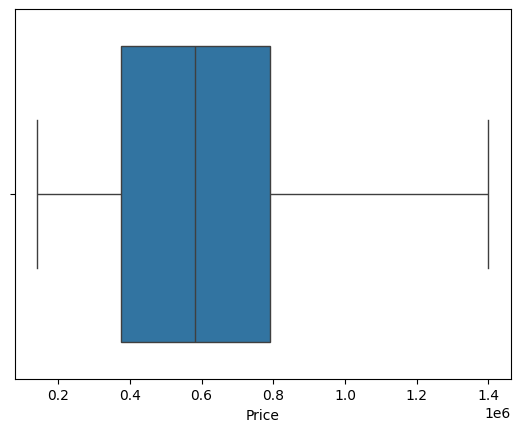

In [29]:
sns.boxplot(x=house_df['Price'])

In [17]:
Q1 = house_df['Beds'].quantile(0.25)
Q3 = house_df['Beds'].quantile(0.75)
IQR = Q3-Q1
lower = house_df['Beds'] < Q1 - (1.5*IQR)
higher = house_df['Beds'] > Q3 + (1.5*IQR)

house_df.drop(house_df[lower].index, inplace=True)
house_df.drop(house_df[higher].index, inplace=True)

<Axes: xlabel='Beds'>

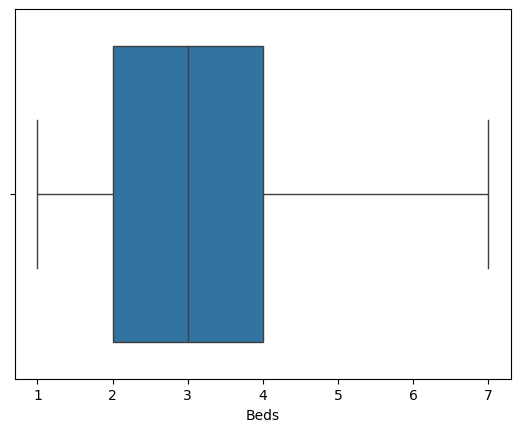

In [30]:
sns.boxplot(x=house_df['Beds'])

In [19]:
Q1 = house_df['Bath'].quantile(0.25)
Q3 = house_df['Bath'].quantile(0.75)
IQR = Q3-Q1
lower = house_df['Bath'] < Q1 - (1.5*IQR)
higher = house_df['Bath'] > Q3 + (1.5*IQR)

house_df.drop(house_df[lower].index, inplace=True)
house_df.drop(house_df[higher].index, inplace=True)

<Axes: xlabel='Bath'>

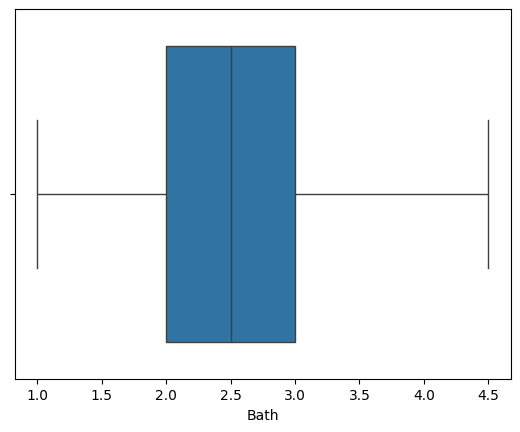

In [25]:
sns.boxplot(x=house_df['Bath'])

In [21]:
Q1 = house_df['Sq.Ft'].quantile(0.25)
Q3 = house_df['Sq.Ft'].quantile(0.75)
IQR = Q3-Q1
lower = house_df['Sq.Ft'] < Q1 - (1.5*IQR)
higher = house_df['Sq.Ft'] > Q3 + (1.5*IQR)

house_df.drop(house_df[lower].index, inplace=True)
house_df.drop(house_df[higher].index, inplace=True)

<Axes: xlabel='Sq.Ft'>

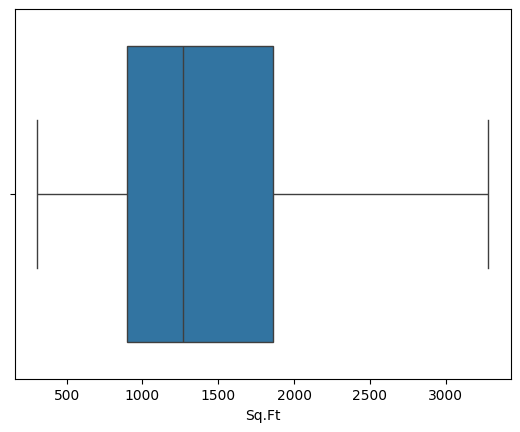

In [24]:
sns.boxplot(x=house_df['Sq.Ft'])

In [31]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3066 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      3066 non-null   object 
 1   Price        3066 non-null   int64  
 2   Description  3066 non-null   object 
 3   Place        3066 non-null   object 
 4   Beds         3066 non-null   int64  
 5   Bath         3066 non-null   float64
 6   Sq.Ft        3066 non-null   int64  
 7   Website      3066 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 215.6+ KB


## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [32]:
numerical_features = ['Price', 'Beds', 'Bath', 'Sq.Ft']
categorical_features = ['Address', 'Description', 'Place', 'Website']

##### Categorical Features

Fitur Address

                                jumlah sampel  persentase
Address                                                  
3704 42 St SW                               1         0.0
2233 34 Ave SW #323                         1         0.0
1408 17 St SE #205                          1         0.0
221 Santana Mews NW                         1         0.0
99 Spruce Place SW #1505                    1         0.0
...                                       ...         ...
7475 202 Ave SE                             1         0.0
3014 Edenwold Heights NW #3014              1         0.0
680 Cornerstone Blvd NE                     1         0.0
49 Rocky Ridge Heights NW                   1         0.0
1709 32 St SW                               1         0.0

[3066 rows x 2 columns]


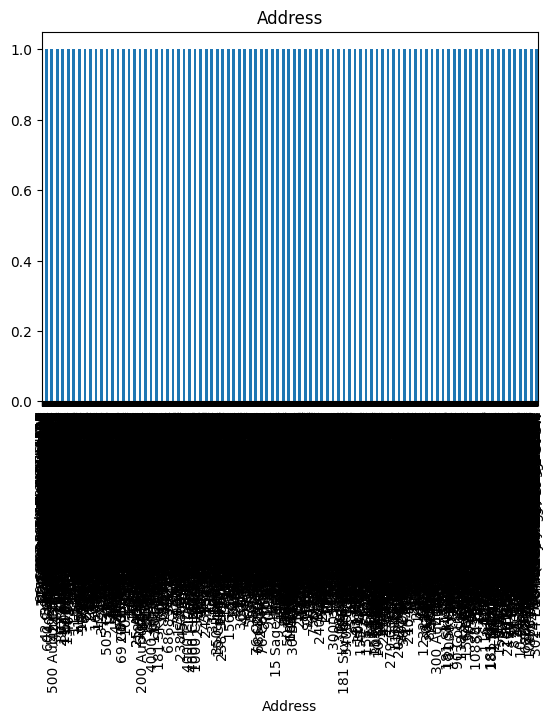

In [33]:
feature = categorical_features[0]
count = house_df[feature].value_counts()
percent = 100*house_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Fitur Description

                jumlah sampel  persentase
Description                              
CA  AB T2P 1J3             10         0.3
CA  AB T2G 0B5             10         0.3
CA  AB T2G 1E5              8         0.3
CA  AB T3A 3H1              7         0.2
CA  AB T2X 2B9              7         0.2
...                       ...         ...
CA  AB T2K 4H1              1         0.0
CA  AB T3H 5V7              1         0.0
CA  AB T3E 1T7              1         0.0
CA  AB T2N 0C4              1         0.0
CA  AB T3C 1N6              1         0.0

[2502 rows x 2 columns]


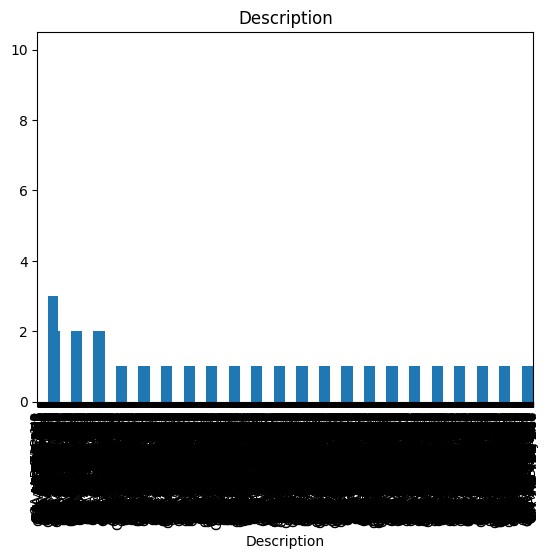

In [34]:
feature = categorical_features[1]
count = house_df[feature].value_counts()
percent = 100*house_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Fitur Place

                    jumlah sampel  persentase
Place                                        
Beltline                      153         5.0
Saddle Ridge                   67         2.2
Legacy                         60         2.0
Mahogany                       49         1.6
Skyview Ranch                  48         1.6
...                           ...         ...
Prominence Heights              1         0.0
The Block                       1         0.0
Southwood Village               1         0.0
Scarboro Park                   1         0.0
Brighton Court                  1         0.0

[304 rows x 2 columns]


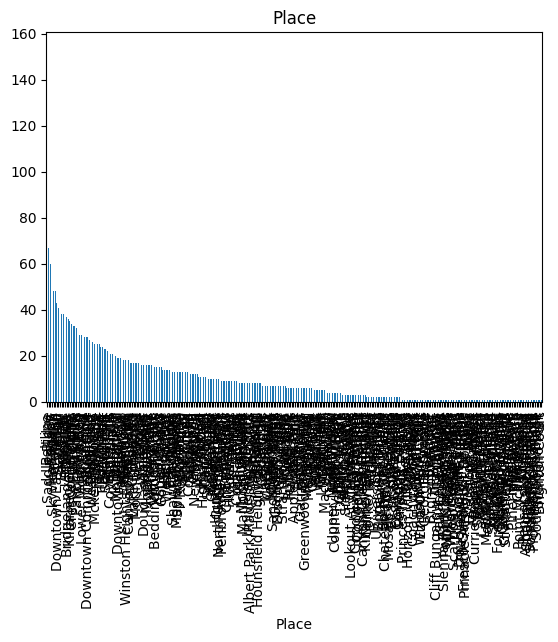

In [35]:
feature = categorical_features[2]
count = house_df[feature].value_counts()
percent = 100*house_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Fitur Website

                                     jumlah sampel  persentase
Website                                                       
Cir Realty                                     273         8.9
Exp Realty                                     225         7.3
RE/MAX Real Estate (Central)                   196         6.4
Real Broker                                    195         6.4
RE/MAX House Of Real Estate                    142         4.6
...                                            ...         ...
Listed by Steve Strachan                         1         0.0
Listed by May Davidson                           1         0.0
Listed by Mariangela Avila                       1         0.0
Listed by Zoe Saraceni                           1         0.0
E-Trinity Realty And Management Ltd              1         0.0

[208 rows x 2 columns]


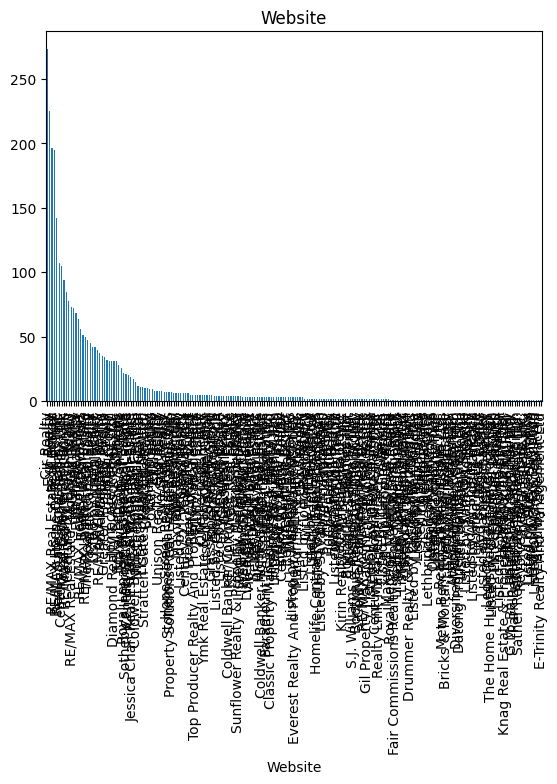

In [36]:
feature = categorical_features[3]
count = house_df[feature].value_counts()
percent = 100*house_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Dengan mengamati beberapa barchart di atas, kita memperoleh beberapa informasi, antara lain:**
*   Fitur 'Address' memiliki data dengan persebarang paling luas dan bisa dikatakan sebagai unique data.
*   Categorical Features pada dataset ini memiliki persebaran yang cukup luas dan cukup sulit untuk membuat kategori yang cukup berpengaruh untuk fitur 'Price'.

##### Numerical Features

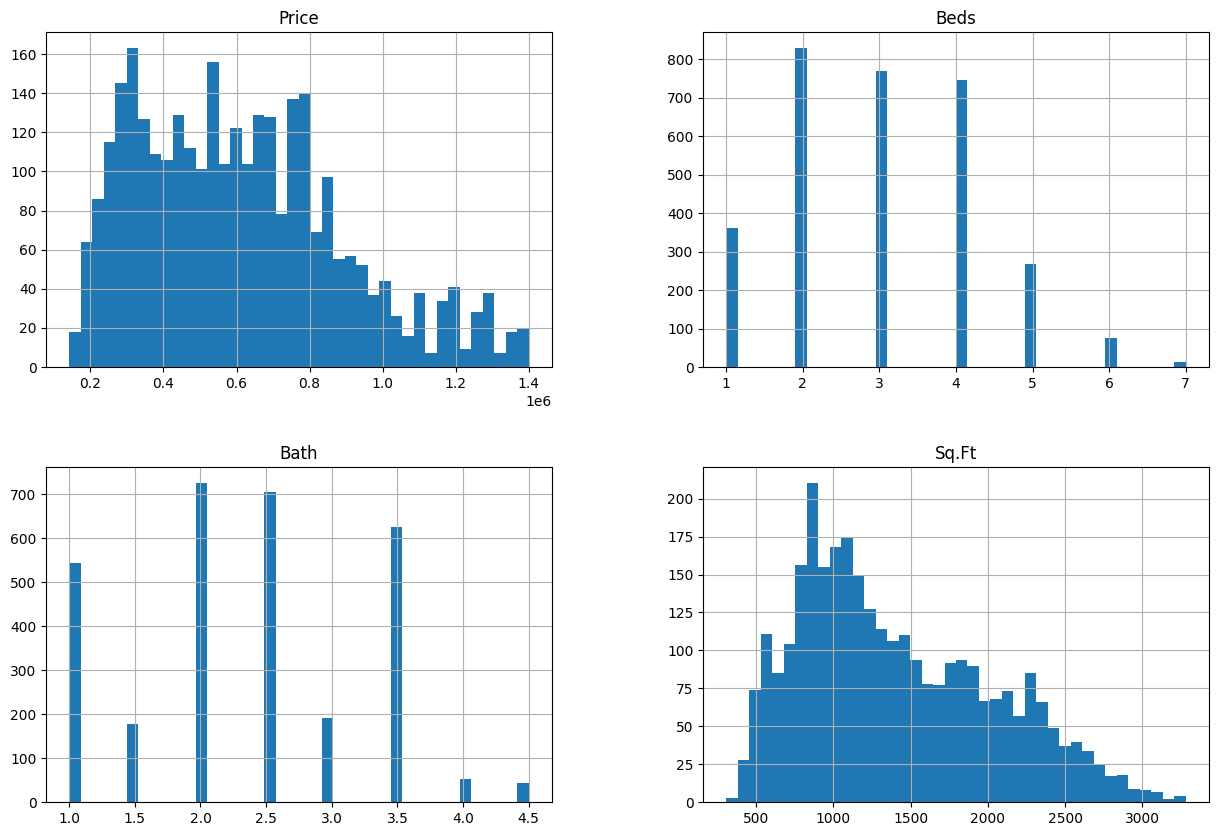

In [37]:
house_df.hist(bins=40, figsize=(15,10))
plt.show()

**Dengan mengamati histogram di atas, khususnya variabel price yang merupakan fitur target, kita memperoleh beberapa informasi, antara lain:**
*   Peningkatan 'price' sebanding dengan penurunan jumlah sample. Hal ini dapat kita lihat jelas dari histogram 'price' yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
*   Distribusi 'price' miring ke kanan (right-skewed)

### Multivariate Analysis

##### Categorical Features

In [38]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3066 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      3066 non-null   object 
 1   Price        3066 non-null   int64  
 2   Description  3066 non-null   object 
 3   Place        3066 non-null   object 
 4   Beds         3066 non-null   int64  
 5   Bath         3066 non-null   float64
 6   Sq.Ft        3066 non-null   int64  
 7   Website      3066 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 215.6+ KB


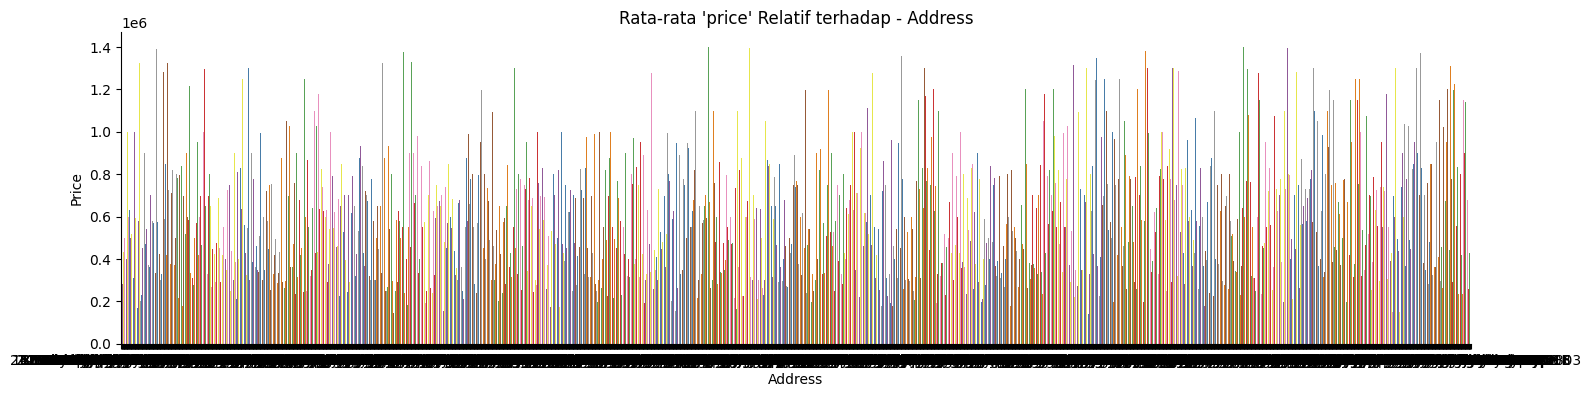

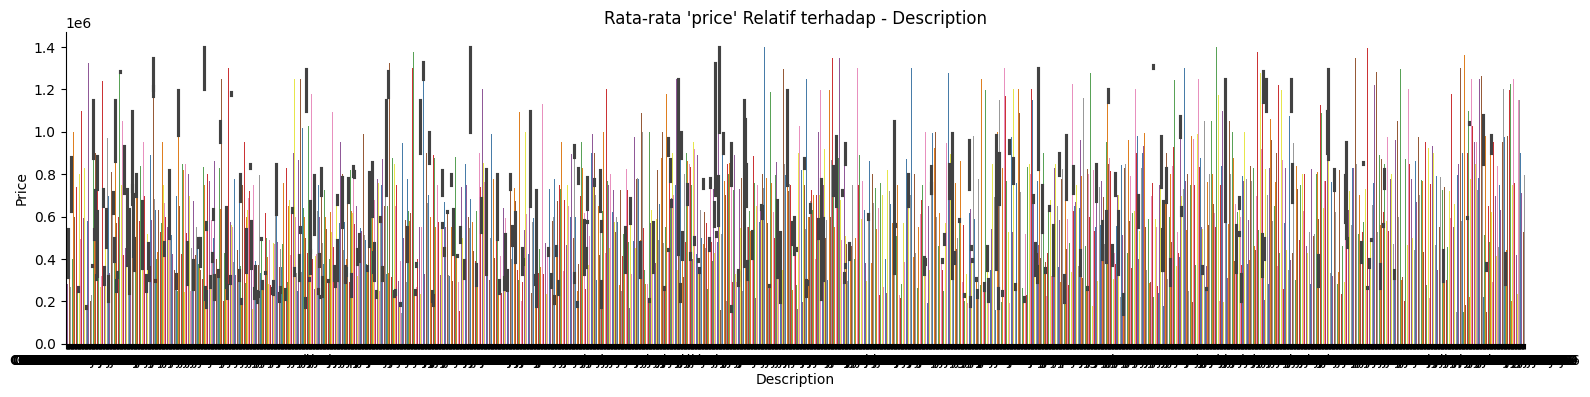

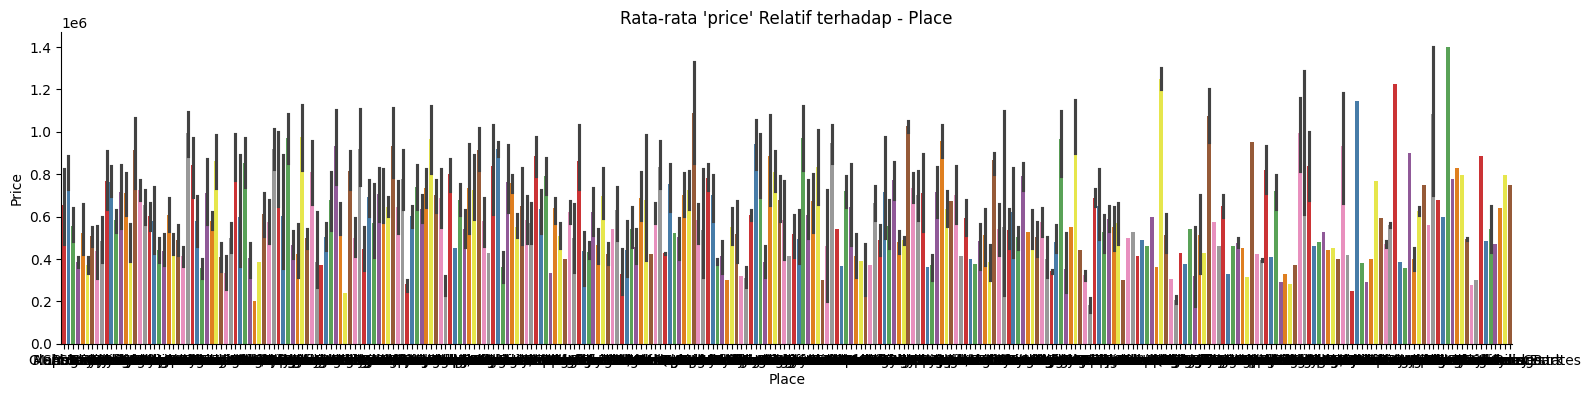

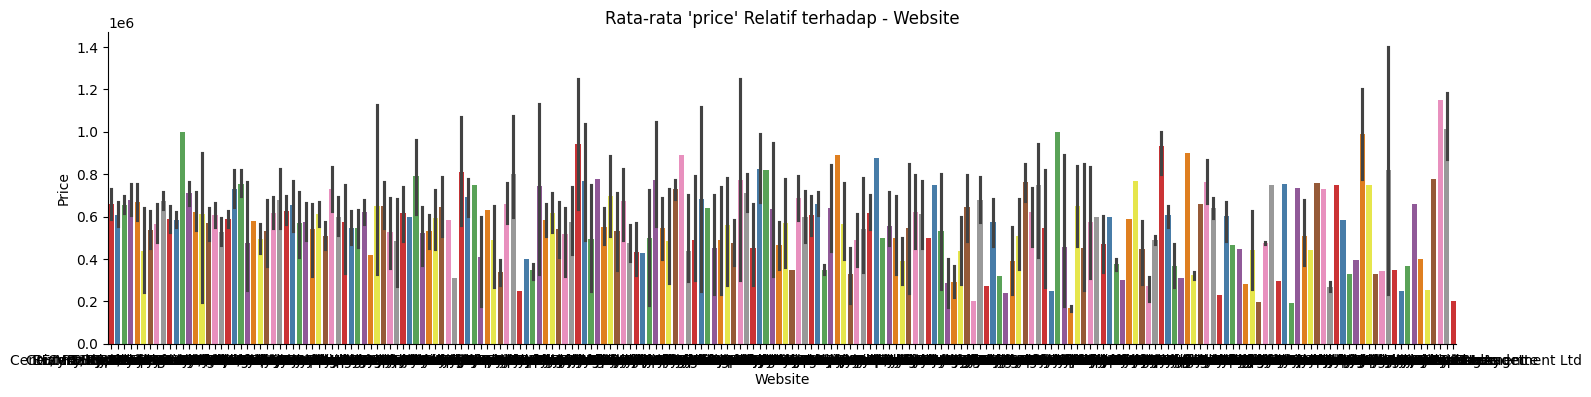

In [39]:
cat_features = house_df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Price", hue=col, kind="bar", dodge=False, height = 4, aspect = 4,  data=house_df, palette="Set1", legend=False)
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

**Dengan mengamati rata-rata price relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:**
*   Pada fitur ‘Address’, secara umum, memiliki persebaran yang sangat luas dan bahkan bisa dikatakan sebagai data unique dan memiliki pengaruh rendah terhadap 'price'.
*   Pada fitur ‘Description’, secara umum, hampir setiap rumah memiliki deskripsinya masing-masing dan memiliki pengaruh yang rendah terhadap 'price'.
*   Pada fitur ‘Place’, secara umum, persebaran pada fitur Place lebih sedikit dibanding dengan 'Address' dan 'Description'. Namun, fitur 'Place' masih memiliki pengaruh yang rendah terhadap 'price'.
*   Pada fitur ‘Website’, secara umum, fitur 'website' tidak memiliki pengaruh yang signifikan terhadap 'price' dan fitur 'website' lebih menunjukkan rata-rata 'price' yang cenderung mirip.
>**Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap price.**

Karena Categorical Features memiliki pengaruh yang rendah terhadap price, maka kita akan hapus atau drop kolom yang memiliki Categorical Features tersebut. 

In [40]:
house_df.drop(categorical_features, inplace=True, axis=1)

In [41]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3066 entries, 0 to 3359
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3066 non-null   int64  
 1   Beds    3066 non-null   int64  
 2   Bath    3066 non-null   float64
 3   Sq.Ft   3066 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 119.8 KB


##### Numerical Features

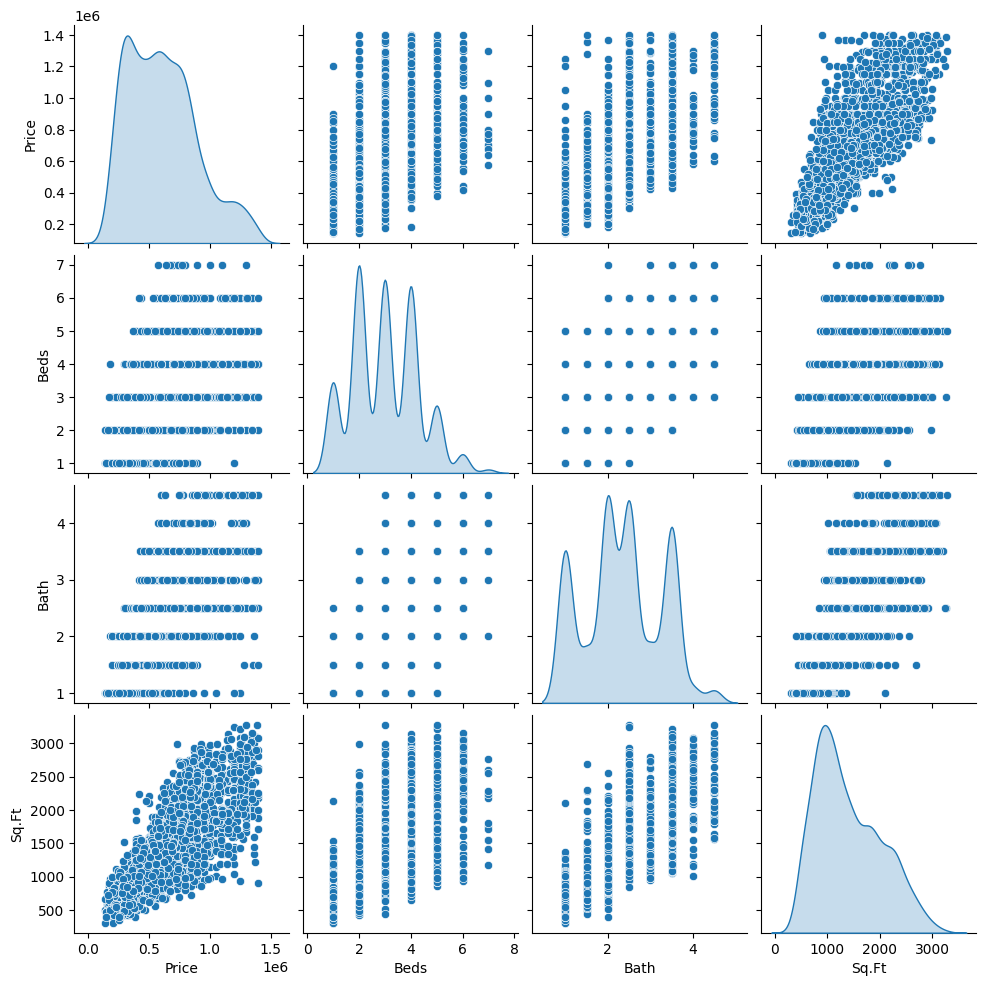

In [42]:
sns.pairplot(house_df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

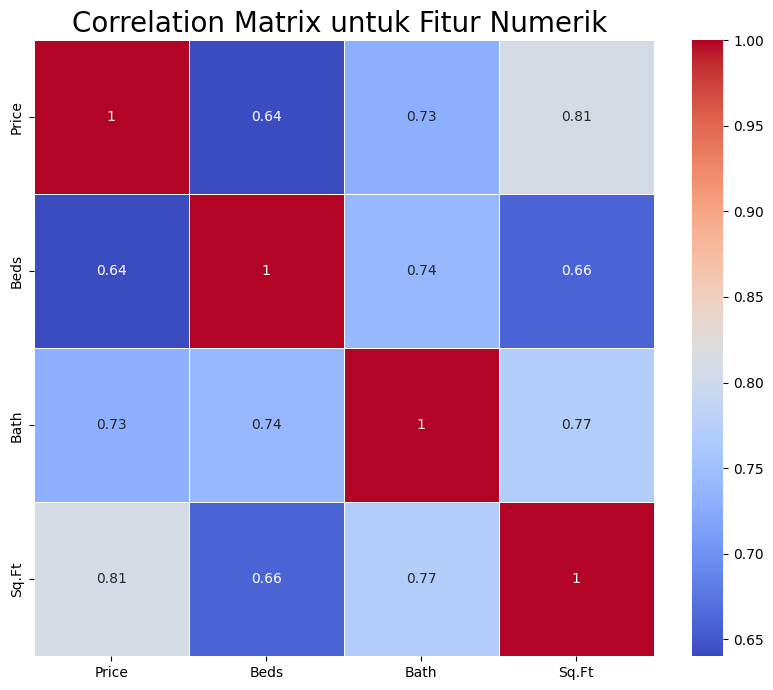

In [43]:
plt.figure(figsize=(10, 8))
correlation_matrix = house_df[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

**Dengan mengamati pairplot dan correlation matrix terhadap price, kita memperoleh insight sebagai berikut:**
*   Fitur ‘Sq.Ft’, memiliki hubungan korelasi positif terhadap fitur 'price'.
*   Fitur ‘Sq.Ft’, memiliki korelasi yang paling besar dengan fitur 'price'.
*   Fitur ‘Bath’ dan 'Beds', secara umum, memiliki korelasi sedang terhadap fitur 'price'.
*   Fitur ‘Beds’, memiliki hubungan korelasi paling kecil terhadap fitur 'price'.
>**Kesimpulan akhir, tidak ada fitur yang akan didrop karena masih memiliki hubungan korelasi sedang.**

## Data Preparation

### Encoding Fitur Kategori
Pada tahap ini, kita akan melewatkan proses encoding categorical features karena categorical features pada dataset tidak terlalu berpengaruh terhadap 'Price' dan sudah kita drop, sehingga pada dataset hanya terdapat numerical features.

### Reduksi Dimensi dengan PCA

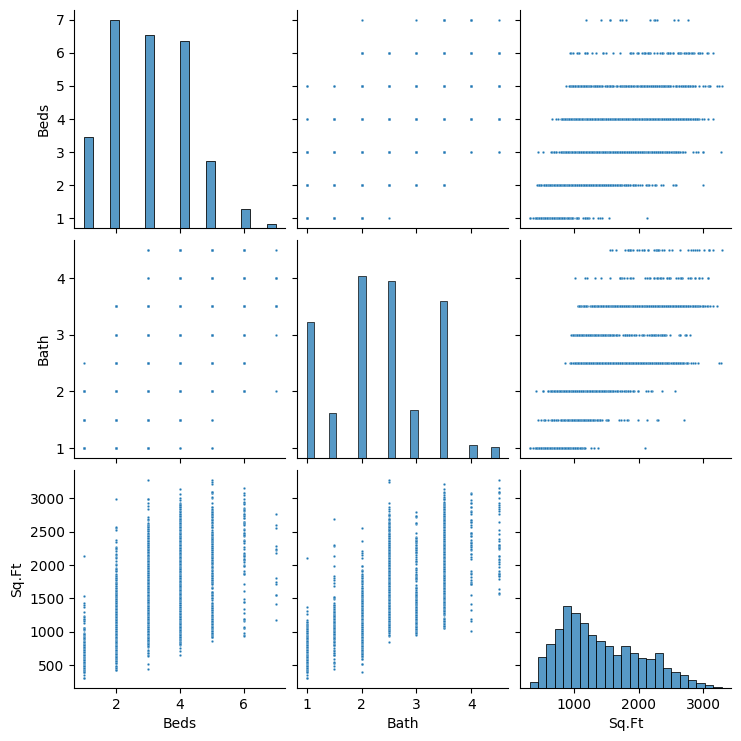

In [44]:
sns.pairplot(house_df[['Beds','Bath','Sq.Ft']], plot_kws={"s": 3});

Text(0.5, 1.0, "Correlation Matrix untuk 'Sq.Ft', 'Beds', 'Bath'")

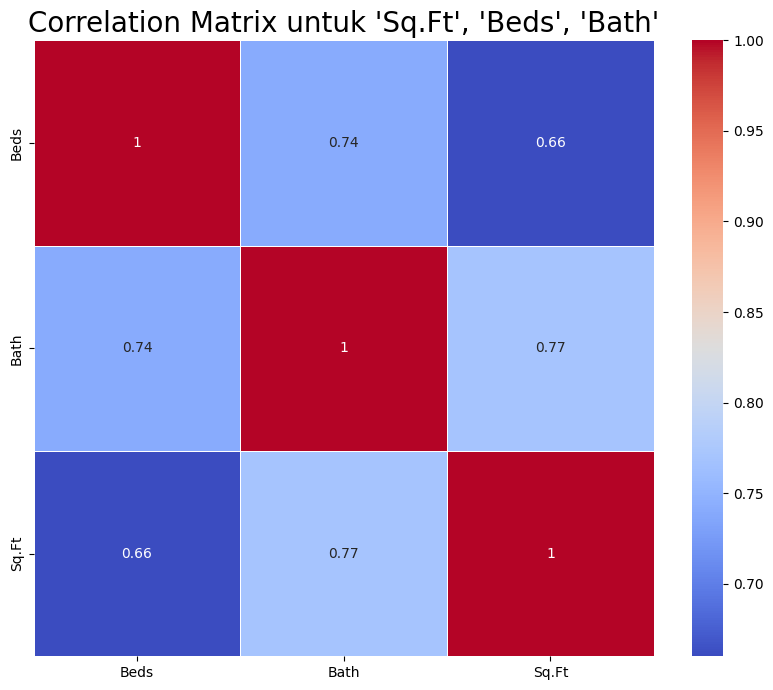

In [45]:
plt.figure(figsize=(10, 8))
correlation_matrix = house_df[['Beds','Bath','Sq.Ft']].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk 'Sq.Ft', 'Beds', 'Bath'", size=20)

Berdasarkan hasil dari Pairplot dan Correlation Matrix diatas, kita juga akan melewatkan proses reduksi dimensi menggunakan PCA karena tidak ada fitur yang memiliki korelasi sangat tinggi.

### Train-Test-Split
Kita akan membagi dengan proporsi pembagian sebesar 80:20 seperti pada referensi yang kita gunakan.

In [46]:
X = house_df.drop(["Price"],axis =1)
y = house_df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size= 0.8, random_state = 123)

In [47]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3066
Total # of sample in train dataset: 2452
Total # of sample in test dataset: 614


### Standarisasi
Mengubah nilai fitur agar mendekati distribusi normal agar algoritma machine learning memilki performa yang baik.

In [48]:
numerical_features = ['Beds', 'Bath', 'Sq.Ft']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Beds,Bath,Sq.Ft
2954,0.011624,0.177225,0.036636
237,0.803378,0.734346,-0.349194
3085,0.011624,0.177225,1.533335
2412,-1.571883,-1.494140,-1.572596
1851,0.011624,0.177225,2.444859


In [49]:
X_train[numerical_features].describe().round(4)

,Beds,Bath,Sq.Ft
count,2452.0000,2452.0000,2452.0000
mean,-0.0000,-0.0000,-0.0000
std,1.0002,1.0002,1.0002
min,-1.5719,-1.4941,-1.7607
25%,-0.7801,-0.3799,-0.8078
50%,0.0116,0.1772,-0.2351
75%,0.8034,0.7343,0.7283
max,3.1786,2.4057,3.0204


## Model Development

In [50]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['RF1', 'RF2', 'RF3'])

In [82]:
RF1 = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=15, n_jobs=-1)
RF1.fit(X_train, y_train)
 
models.loc['train_mse','RF1'] = mean_squared_error(y_pred=RF1.predict(X_train), y_true=y_train)          

In [83]:
RF2 = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=40, n_jobs=-1)
RF2.fit(X_train, y_train)
 
models.loc['train_mse','RF2'] = mean_squared_error(y_pred=RF2.predict(X_train), y_true=y_train)          

In [84]:
RF3 = RandomForestRegressor(n_estimators=2000, max_depth=1000, random_state=1500, n_jobs=-1)
RF3.fit(X_train, y_train)
 
models.loc['train_mse','RF3'] = mean_squared_error(y_pred=RF3.predict(X_train), y_true=y_train)          

## Evaluasi Model

Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1

In [85]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Membuat Dataframe berisi nilai mse train dan test

In [86]:
mse = pd.DataFrame(columns=['train', 'test'], index=['RF1', 'RF2', 'RF3'])
model_dict = {'RF1': RF1, 'RF2': RF2, 'RF3': RF3}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e5 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e5

mse

,train,test
RF1,210767.598803,2182114.71799
RF2,53843.059563,2666325.929435
RF3,52874.416766,2685907.592525


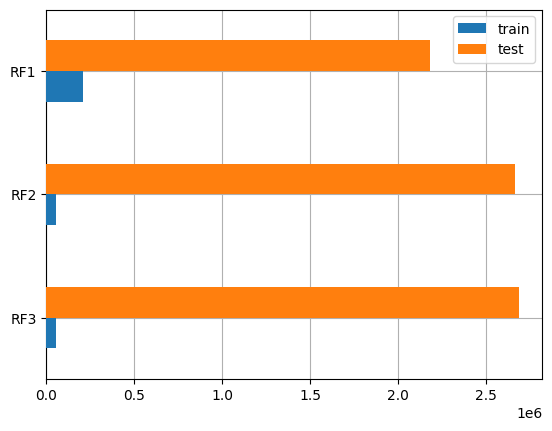

In [87]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [88]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['hasilprediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)


,y_true,hasilprediksi_RF1,hasilprediksi_RF2,hasilprediksi_RF3
1915,694000,252847.2,192374.0,190106.1
